### Bootstrap Method

True distribution:

$S125^T$ = signal at 125m

$ \theta^T$

In [1]:
import numpy as np
import scipy as sp
import pandas as pd

from scipy import optimize

%matplotlib inline 
import matplotlib.pyplot as plt

In [2]:
from simul_functions import get_random_vars,S_i,S_ref,rndm, S_i_fit

/home/noemie/stage/simul_functions.py:49: RuntimeWarning: invalid value encountered in log10
  data['lgS'] = np.log10(data.S)


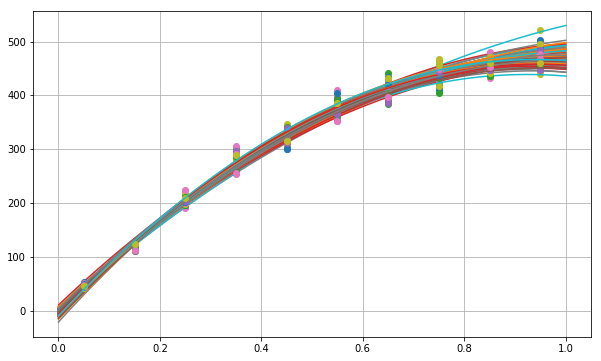

<class 'pandas.core.indexes.numeric.Int64Index'>


In [3]:
N=100
m=1000

E0 = 10**15
E1 = 10**18
gamma = -2.5

A = 10**12
B = 1.2
b=0.919
a=-1.13
c=1

E = rndm(E0, E1, gamma, m) 
    
S_i_ref=S_ref(A,B,E)
cos_2 = np.random.rand(m)
S125=S_i(a,b,c,cos_2,S_i_ref)

fig2, ax2 = plt.subplots(figsize=(10,6))
plt.grid()

ref_intensity =50
S_list=[]
S_2_list=[]
for i in range(0,N):
    mydata=get_random_vars(m,cos_2,S125)
    val = mydata.loc[mydata.I == ref_intensity]
    S_list.append(val.S)
    S_2_list.append(val.S**2)
    mydata.drop(mydata.index,  inplace=True)
    
    bins2=np.linspace(0.05,0.95,10, endpoint = True)
    att_fit2, cov2 =sp.optimize.curve_fit(S_i_fit, bins2, val.S)
    x=np.linspace(0,1, 1000)
    ax2.plot(bins2, val.S, lw=0, marker='o')
    ax2.plot(x, S_i_fit(x,att_fit2[0],att_fit2[1],att_fit2[2]))
    
S_array=np.asarray(S_list)
S_2=np.asarray(S_2_list)
S_array2=S_array.transpose()
S_2T=S_2.transpose()


plt.show()
print(type(mydata.index))

In [4]:
mean_S=[]
delta_S=[]
for i in range(0,len(S_array2)):
    mean_S.append(np.mean(S_array2[i])) 
    delta_S.append(np.sqrt(0.1*mean_S[i]))
    delta_theta=(1,5)

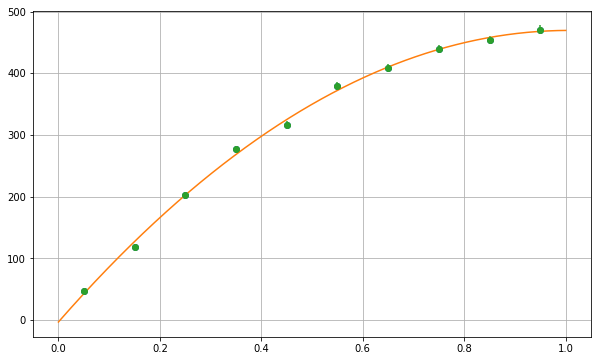

In [5]:
fig2, ax2 = plt.subplots(figsize=(10,6))
plt.grid()
sigma_S=np.asarray(delta_S)
bins2=np.linspace(0.05,0.95,10, endpoint = True)
att_fit2, cov2 =sp.optimize.curve_fit(S_i_fit, bins2, mean_S)
x=np.linspace(0,1, 1000)
ax2.plot(bins2, mean_S, lw=0, marker='o')
ax2.plot(x, S_i_fit(x,att_fit2[0],att_fit2[1],att_fit2[2]))
plt.errorbar(bins2, mean_S, xerr=None, yerr=sigma_S, fmt='o')

plt.show()